In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string   
import re

In [15]:
!pip install nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Andriya
[nltk_data]     Tiwary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df=pd.read_csv('raw_mobile_reviews.csv')
df.head()

,mobile_names,asin,title,body,star
0,"\n\n\n\n\n\n\n\nRedmi 9 (Sky Blue, 4GB RAM, 64...",B08697N43N,\nDONT BUY THIS MOBILE .\n,\n\n Don’t buy this product .Image quality is...,1
1,"\n\n\n\n\n\n\n\nRedmi 9 (Sky Blue, 4GB RAM, 64...",B08697N43N,"\nRedmi 9 hhoo, 9, 9🤩, 9, changed mind\n",\n\n Let’s make one thing clear immediately: ...,4
2,"\n\n\n\n\n\n\n\nRedmi 9 (Sky Blue, 4GB RAM, 64...",B08697N43N,\nAwesome\n,\n\n Awesome\n\n,5
3,"\n\n\n\n\n\n\n\nRedmi 9 (Sky Blue, 4GB RAM, 64...",B08697N43N,\nBest in budget\n,\n\n Best buy at this price! The display qual...,5
4,"\n\n\n\n\n\n\n\nRedmi 9 (Sky Blue, 4GB RAM, 64...",B08697N43N,\nWorst experience\n,\n\n Very bad experience from Amazon. Very ba...,1


In [7]:
def deEmojify(inputString):               # to remove emojis in the text.
    try:
        return inputString.encode('ascii', 'ignore').decode('ascii') 
    except:
        return inputString

STOPWORDS=stopwords.words("english")    # most common unnecessary words. eg is, he, that, etc

def filter_text(text):
    text=text.strip('\n')
    text=deEmojify(str(text))
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned)    # remove extra white spaces
 
    text_cleaned=text_cleaned.lower()              # converting to lowercase
    tokens=text_cleaned.split(" ")
   
    tokens=[token for token in tokens if token not in STOPWORDS]       # Taking only those words which are not stopwords
    text_cleaned = ' '.join([str(token) for token in tokens]) 
    
    return text_cleaned

In [8]:
print(filter_text('This phone is awesome!. But the display quality and battery backup is not good. '))

phone awesome display quality battery backup good 


In [9]:
df['body']=df['body'].apply(lambda x:filter_text(x))
df['mobile_names']=df['mobile_names'].apply(lambda x:filter_text(x))

In [10]:
df.drop(['title'], axis = 1, inplace=True)

In [11]:
df.head()

,mobile_names,asin,body,star
0,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,dont buy product image quality average compar...,1
1,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,lets make one thing clear immediately xiaomi ...,4
2,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,awesome,5
3,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,best buy price display quality amazing compla...,5
4,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,bad experience amazon bad camera quality phon...,1


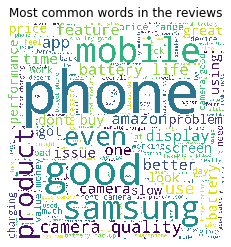

In [24]:
wordcloud = WordCloud(height=12000, width=12000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['body'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.savefig('word_cloud.png')

Text(0.5, 1.0, 'Distribution of Reviews Category')

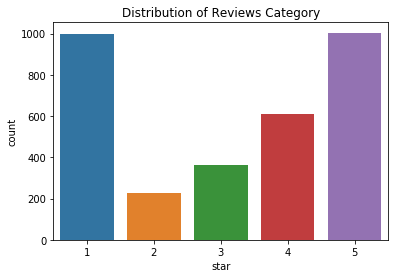

In [25]:
sns.countplot(df['star']).set_title("Distribution of Reviews Category")

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Andriya
[nltk_data]     Tiwary\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# Saving the cleaned Data
df.to_csv('phone_reviews.csv')
df.to_excel("phone_reviews.xlsx")

In [65]:
data=pd.read_csv('phone_reviews.csv',index_col=0)
data.head()

,mobile_names,asin,body,star
0,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,dont buy product image quality average compar...,1
1,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,lets make one thing clear immediately xiaomi ...,4
2,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,awesome,5
3,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,best buy price display quality amazing compla...,5
4,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,bad experience amazon bad camera quality phon...,1


In [77]:
data['star'].value_counts()

5    1004
1     998
4     608
3     364
2     226
Name: star, dtype: int64